In [1]:
import pandas as pd
import numpy as np
from NFL import NFL_GA

In [2]:
positions = {
    1: 'QB',
    2 : 'RB',
    3: 'RB',
    4: 'D',
    5: 'WR',
    6: 'WR',
    7: 'WR',
    8: 'TE'
}

salary_cap = 50000

nfl = NFL_GA(11, 25, positions, 50000)


/Users/grahamguthrie99stinky/Dev/gsquared/ml/DFS/env/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/grahamguthrie99stinky/Dev/gsquared/ml/DFS/NFL.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Proj Att'] = df['Proj Pass Att'] + df['Proj Rush Att'] + df['Proj Targets']
/Users/grahamguthrie99stinky/Dev/gsquared/ml/DFS/env/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [3]:
nfl.createBestLineupsWithModel(25)

Cat 1
Cat 2
Cat 3


/Users/grahamguthrie99stinky/Dev/gsquared/ml/DFS/NFL.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Total'] = frame['Total'] * self.expected_values[position]


19
25
16
25
17
25
18
25
17
25
18
25
20
25
20
25
15
25
18
25
20
25
19
25
20
25
17
25
19
25
14
25
16
25
18
25
17
25
15
25
17
25
22
25
18
25
18
25
19
25
*****************


In [4]:
x = pd.read_csv('E_BestCreatedLineups/NFL/11')

In [5]:
x['Player Name'].value_counts()

Jamison Crowder         14
Justin Herbert          11
Jerry Jeudy             11
Aaron Jones             11
Ezekiel Elliott         11
Adam Thielen             9
Hunter Henry             8
Indianapolis Colts       8
Mike Gesicki             7
Trey Burton              7
CeeDee Lamb              6
Miami Dolphins           5
Breshad Perriman         4
Denzel Mims              3
Amari Cooper             3
Philip Rivers            3
Denver Broncos           3
Zach Pascal              3
Melvin Gordon III        2
Jack Doyle               2
Kirk Cousins             2
T.Y. Hilton              2
Los Angeles Chargers     2
Frank Gore               2
Nyheim Hines             2
Davante Adams            2
Joshua Kelley            2
Tony Pollard             2
Phillip Lindsay          2
Michael Pittman Jr.      2
Justin Jefferson         2
Jakeem Grant             2
Andy Dalton              2
Chris Herndon            1
Jordan Wilkins           1
Alexander Mattison       1
Minnesota Vikings        1
L

In [3]:
df= nfl.pullFullSeasonData()

/Users/grahamguthrie99stinky/Dev/gsquared/ml/DFS/env/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/grahamguthrie99stinky/Dev/gsquared/ml/DFS/NFL.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Proj Att'] = df['Proj Pass Att'] + df['Proj Rush Att'] + df['Proj Targets']
/Users/grahamguthrie99stinky/Dev/gsquared/ml/DFS/env/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [129]:
filters = nfl.getPositionFilters(df)
filtered = nfl.filterPlayerPoolRe(df)

In [130]:
x =pd.merge(df,filtered, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [131]:
x['Actual FP'].describe()

count    1094.000000
mean        3.055302
std         5.116307
min        -3.000000
25%         0.000000
50%         0.500000
75%         4.300000
max        45.600000
Name: Actual FP, dtype: float64

<AxesSubplot:>

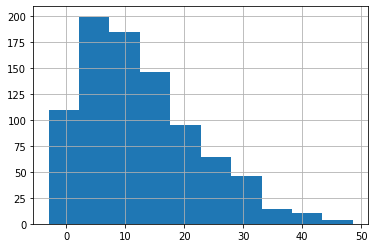

In [132]:
filtered['Actual FP'].hist()

In [133]:
filtered.groupby('Pos')['Actual FP'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
D,113.0,6.451327,5.700863,-3.0,3.000,5.00,9.00,26.0
QB,122.0,21.617213,8.738768,1.5,14.625,20.70,27.85,43.8
RB,153.0,15.399346,9.600079,0.0,8.400,14.00,21.50,48.6
TE,184.0,7.903261,7.781496,0.0,1.900,6.55,10.90,43.1
WR,299.0,12.701003,8.585083,0.0,6.050,11.10,17.70,42.6


In [134]:
filtered.groupby('Pos')['Actual FP'].median()

Pos
D      5.00
QB    20.70
RB    14.00
TE     6.55
WR    11.10
Name: Actual FP, dtype: float64

In [144]:
filtered

Likes Pos  Salary Team  Proj FP  Proj Val  \
Week       Player Name                                                       
2020-09-20 Lamar Jackson           8.0  QB    8200  BAL     26.5       3.2   
           Patrick Mahomes        10.0  QB    7700   KC     23.3       3.0   
           Aaron Rodgers           5.0  QB    6900   GB     21.2       3.1   
           Dak Prescott           13.0  QB    6800  DAL     23.4       3.4   
           Josh Allen             17.0  QB    6700  BUF     22.3       3.3   
...                                ...  ..     ...  ...      ...       ...   
2020-10-18 Cincinnati Bengals      1.0   D    2100  CIN      4.6       2.2   
2020-09-20 Cincinnati Bengals      4.0   D    2700  CIN      5.7       2.1   
2020-09-27 New Orleans Saints      4.0   D    2900   NO      5.2       1.8   
2020-10-04 Los Angeles Chargers    1.0   D    2900  LAC      5.6       1.9   
2020-10-11 Chicago Bears           4.0   D    2700  CHI      5.8       2.1   

                                 Actual FP  Actual Val   Proj Att  Pos Quants  
Week       Player Name                                                         
2020-09-20 Lamar Jackson              17.6         2.1  41.400000         3.0  
           Patrick Mahomes            30.5         4.0  39.600000         4.0  
           Aaron Rodgers              19.2         2.8  37.800000         3.0  
           Dak Prescott               43.8         6.4  39.500000         4.0  
           Josh Allen                 37.5         5.6  41.000000         4.0  
...                                    ...         ...        ...         ...  
2020-10-18 Cincinnati Bengals          4.0         1.9   3.663004         2.0  
2020-09-20 Cincinnati Bengals         -2.0        -0.7   4.081633         0.0  
2020-09-27 New Orleans Saints         -3.0        -1.0   4.032258         0.0  
2020-10-04 Los Angeles Chargers        4.0         1.4   4.032258         2.0  
2020-10-11 Chicago Bears               6.0         2.2   4.166667         3.0  

[871 rows x 10 columns]